#End to End Machine Learning Project 

todo
1.add k-means analysis
determine different types of patients 
2.add unbalanced class analysis
write script for up sampling 
3.build feature importance for deep learning 
feature feature imporant with random forest
4.build simulation 
1. fit columns to distributions
2. generate data 
3. build discrete event simulation
4. analyze load in hospitals

#Business Case - Data Science for Hospital and Medical Industry 
##Generic Hospital is looking to improve their in-house patient service, the following notebook is meant to serve as an example of using data analysis and machine learning to improve the in-house patient process. The following are objectives of this analysis

###1 .Understand the key relationships which impact the length of stay of patients in hospitals in the provided data. Analysis to be completed include basic statisical analysis, univariate analysis, multivariate analysis.
###2. Build a prediction model to predict length of stay in hospital given various symptoms. We will build tree based models as well as deep learning models. The metrics will be R2, MAE, RMSE on target varible of length of stay. Best models will be based on metrics, test data, variation in trees, model explianibility. Understand and research which factor impact the length of stay
###3.Perform a clustering analysis using K-means to understand various kinds of patients group. Recommend if we provide tailer-made services for each group
###4. Provide any recommendations to improve services for patients based on data science tools. 

# I. Preliminary Analysis

   eid      vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1 2012-08-29      0      F                      0       0        0   
1    2 2012-05-26     5+      F                      0       0        0   
2    3 2012-09-22      1      F                      0       0        0   
3    4 2012-08-09      0      F                      0       0        0   
4    5 2012-12-20      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...   94.078507   
2      0                    0                           0  ...  130.530524   
3      0                    0                           0  ...  163.377028   
4      1                    0                           1  ...   94.886654   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0            12.

,eid,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,malnutrition,hemo,hematocrit,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facid,lengthofstay,v_year,v_month,v_day,discharge_year,discharge_month,discharge_day
eid,1.000000,0.001702,0.008509,0.001446,0.004973,-0.000310,0.002148,0.003328,0.009404,-0.004449,-0.001894,-0.001441,0.004593,-0.006837,0.006638,-0.005771,-0.002303,-0.002549,-0.000199,0.003292,0.002192,0.001136,0.006335,-0.002208,0.007006,0.001543,0.002970,-0.001083,-0.003250,0.001977,-0.001530,-0.000746
rcount,0.001702,1.000000,-0.007477,-0.002509,0.004394,-0.007634,-0.002675,0.000922,-0.004554,0.001357,-0.002657,-0.001936,-0.004032,0.000557,-0.000117,0.001644,-0.002058,-0.003549,-0.006301,-0.003103,0.000951,0.004760,-0.001696,0.004233,-0.004710,0.749514,-0.002289,0.002244,0.005488,0.039861,0.002444,0.005874
gender,0.008509,-0.007477,1.000000,0.074040,-0.061761,0.102153,0.056246,0.048870,0.147810,-0.017844,0.090223,0.013809,0.102387,-0.025778,0.243216,-0.112747,-0.001676,-0.005316,0.121508,0.004357,-0.001546,0.003599,0.053056,0.000375,0.134528,0.069575,0.000238,0.002156,0.000484,0.003650,0.002806,-0.005776
dialysisrenalendstage,0.001446,-0.002509,0.074040,1.000000,-0.005340,0.157381,0.120472,0.049925,0.085162,0.013229,0.311179,0.018211,0.209172,0.177411,-0.120281,-0.053125,-0.000198,-0.003199,0.272239,-0.000372,0.003331,0.003802,-0.043435,0.003251,0.157396,0.169695,0.005651,0.001880,-0.004182,0.021363,-0.001734,-0.006991
asthma,0.004973,0.004394,-0.061761,-0.005340,1.000000,0.020001,0.058444,-0.005668,0.026300,0.026402,-0.008556,0.015787,0.008620,0.015954,-0.032994,0.016505,-0.004474,0.000641,-0.005675,-0.001479,-0.000597,0.006473,0.001910,-0.001108,0.177249,0.082005,-0.001351,0.004810,0.003767,0.008033,0.003310,0.001820
irondef,-0.000310,-0.007634,0.102153,0.157381,0.020001,1.000000,0.151320,0.082848,0.127544,0.019041,0.176662,0.021999,0.300174,0.125682,-0.054934,-0.078817,-0.001443,-0.000598,0.149846,-0.010980,-0.005841,0.002803,-0.047849,0.006194,0.268995,0.193838,-0.002644,-0.002603,0.001530,0.012245,-0.003373,-0.002344
pneum,0.002148,-0.002675,0.056246,0.120472,0.058444,0.151320,1.000000,0.076131,0.089732,0.016293,0.090839,0.025374,0.133551,0.088315,-0.076968,-0.005961,-0.003280,-0.000981,0.064899,-0.001437,0.000650,0.005045,-0.055898,0.000590,0.213995,0.135461,-0.002383,-0.007143,-0.002139,0.009473,-0.008178,-0.004444
substancedependence,0.003328,0.000922,0.048870,0.049925,-0.005668,0.082848,0.076131,1.000000,0.081762,0.004690,0.087252,0.007624,0.048180,0.084697,-0.106387,-0.062084,0.001232,0.001923,0.073065,0.002481,-0.001434,0.002433,-0.058826,-0.000814,0.327803,0.147886,-0.002880,-0.002676,0.003636,0.010898,-0.004220,0.002731
psychologicaldisordermajor,0.009404,-0.004554,0.147810,0.085162,0.026300,0.127544,0.089732,0.081762,1.000000,0.295137,0.096239,0.015112,0.119817,0.066088,0.046264,-0.119881,-0.001268,-0.003387,0.073234,-0.000066,-0.000749,0.000377,0.065988,0.005916,0.713436,0.286724,0.002807,0.003148,0.003434,0.022077,0.001607,-0.002461
depress,-0.004449,0.001357,-0.017844,0.013229,0.026402,0.019041,0.016293,0.004690,0.295137,1.000000,-0.001908,0.011945,0.019038,0.027931,0.026997,-0.053935,-0.005884,0.003777,0.007889,-0.002212,0.001648,0.007289,0.040031,0.001255,0.268896,0.121408,0.000365,-0.002916,-0.009579,0.008384,-0.004210,-0.001522


Index(['eid', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef',
       'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'facid',
       'v_year', 'v_month', 'v_day', 'discharge_year', 'discharge_month',
       'discharge_day'],
      dtype='object')
(100000, 31)
                            OLS Regression Results                            
Dep. Variable:           lengthofstay   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.668e+05
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:41:37   Log-Likelihood:                 9367.5
No

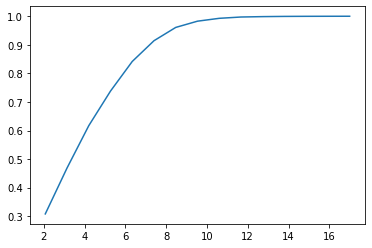

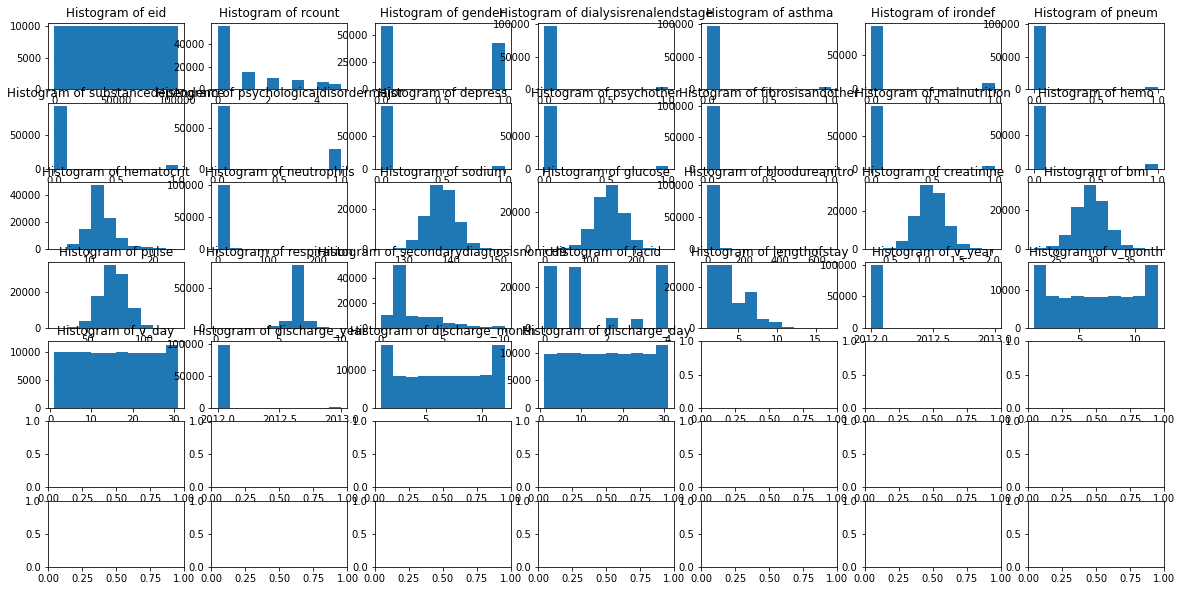

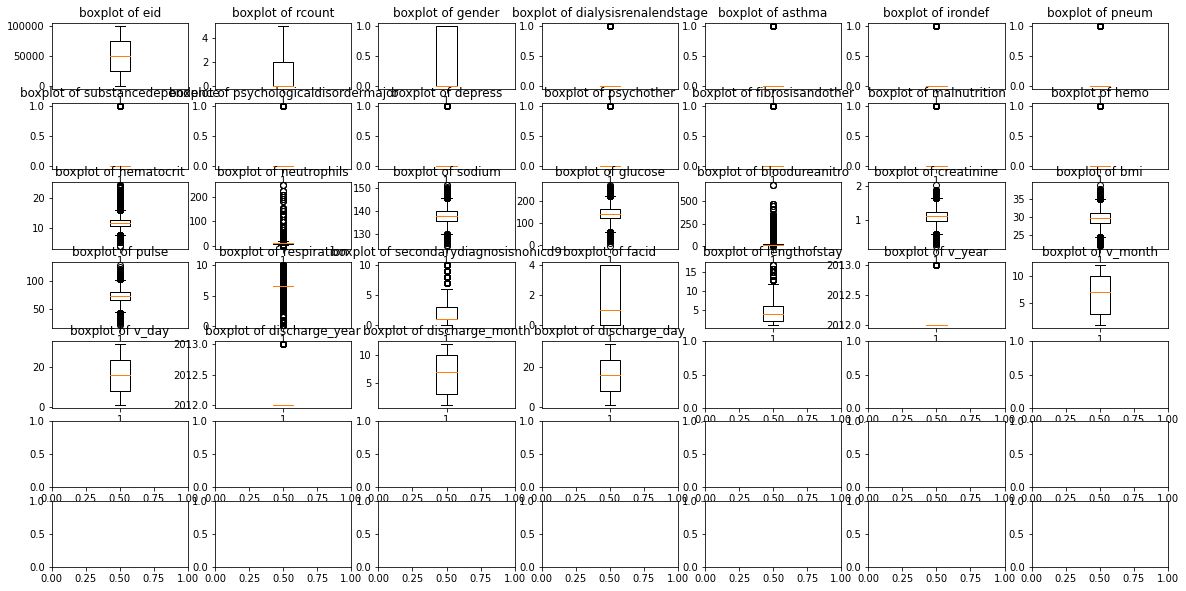

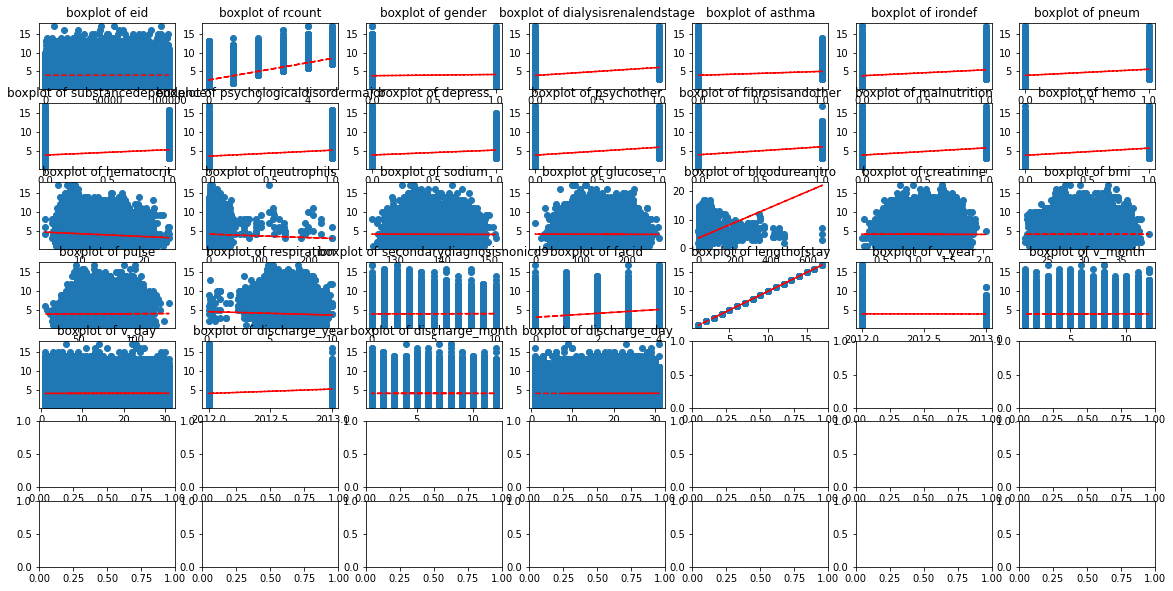

In [ ]:
URL = "LengthOfStay.csv"
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline 

df_raw = pd.read_csv(URL,infer_datetime_format=True,parse_dates=['vdate','discharged'])

def print_summaries():
  """
  1. Print missing values on data frame 
  2. Convert dates to datetime and extract information for year, month, day etc.
  3. Univariate analyis and charts
  4. Find basic probabilities of feature values 
  5. Plot Scatter plots, correlation matrix

  """
  le = LabelEncoder()
  print(df_raw.head())
  print(df_raw.info())
  cat_cols = df_raw.select_dtypes(include='object')
  #apply the label encoder to each column
  for col in cat_cols:
    df_raw[col] = le.fit_transform(df_raw[col])
  
  df_raw['v_year'] = df_raw['vdate'].dt.year
  df_raw['v_month'] = df_raw['vdate'].dt.month
  df_raw['v_day'] = df_raw['vdate'].dt.day

  df_raw['discharge_year'] = df_raw['discharged'].dt.year
  df_raw['discharge_month'] = df_raw['discharged'].dt.month
  df_raw['discharge_day'] = df_raw['discharged'].dt.day
  df_raw.drop(['discharged','vdate'],axis=1,inplace=True)
  print(f"probability of readmission {df_raw[df_raw['rcount']==0].shape[0]/df_raw.shape[0]}")
  
  total_person_with_symptoms = df_raw[df_raw['dialysisrenalendstage']==1].shape[0] +  df_raw[df_raw['depress']==1].shape[0] \
    + df_raw[df_raw['asthma']==1].shape[0] + df_raw[df_raw['irondef']==1].shape[0] + df_raw[df_raw['pneum']==1].shape[0] \
    + df_raw[df_raw['psychologicaldisordermajor']==1].shape[0] 

  total_rows = df_raw.shape[0]

  print(f"probability having atleast one symptoms {total_person_with_symptoms/total_rows}")
  dialysisrenalendstage = df_raw[df_raw['dialysisrenalendstage']==1].shape[0]/total_rows
  asthma = df_raw[df_raw['asthma']==1].shape[0]/total_rows
  irondef = df_raw[df_raw['irondef']==1].shape[0]/total_rows
  pneum = df_raw[df_raw['pneum']==1].shape[0]/total_rows
  psychologicaldisordermajor = df_raw[df_raw['psychologicaldisordermajor']==1].shape[0]/total_rows
  depress = df_raw[df_raw['depress']==1].shape[0]/total_rows
  psychother = df_raw[df_raw['psychother']==1].shape[0]/total_rows
  fibrosisandother = df_raw[df_raw['fibrosisandother']==1].shape[0]/total_rows
  malnutrition = df_raw[df_raw['malnutrition']==1].shape[0]/total_rows
  print(f"probability of dialysisrenalendstage {dialysisrenalendstage}")
  print(f"probability of asthma {asthma}")
  print(f"probability of irondef {irondef}")
  print(f"probability of pneum {pneum}")
  print(f"probability of psychologicaldisordermajor {psychologicaldisordermajor}")
  print(f"probability of depress {depress}")
  print(f"probability of psychother {psychother}")
  print(f"probability of fibrosisandother {fibrosisandother}")
  print(f"probability of malnutrition {malnutrition}")
  print(f"probability of having secondary diagnosies more than one { (df_raw[df_raw['secondarydiagnosisnonicd9']==0].shape[0]+df_raw[df_raw['secondarydiagnosisnonicd9']==1].shape[0]) /total_rows}")

  

# Identify missing values
  missing = df_raw.isnull()

# Sum the missing values in each column
  missing_cols = missing.sum()

# Print the missing values in each column
  print(missing_cols)
  num_cols = df_raw.select_dtypes(include='number')

# Get the names of the numerical columns
  col_names = num_cols.columns

# Create a figure and a set of subplots
  
  target = df_raw['lengthofstay']
  # Use the histogram function to bin the values into 10 bins
  counts, bin_edges = np.histogram(target, bins=15)

  # Calculate the cumulative sum of the counts
  
  cdf = np.cumsum(counts)
  cdf = cdf / cdf[-1]

  plt.plot(bin_edges[1:], cdf)
  
  N = 7
  fig, axs = plt.subplots(N, N, figsize=(20, 10))
  n = 0
  for i, col_name in enumerate(col_names):
    axs[int(n/N), i%N ].hist(df_raw[col_name])
    axs[int(n/N), i%N ].set_title(f'Histogram of {col_name}')
    n+=1

  N = 7
  fig, axs = plt.subplots(N, N, figsize=(20, 10))
  n = 0
  for i, col_name in enumerate(col_names):
    axs[int(n/N), i%N ].boxplot(df_raw[col_name])
    axs[int(n/N), i%N ].set_title(f'boxplot of {col_name}')
    n+=1
  
  N = 7
  fig, axs = plt.subplots(N, N, figsize=(20, 10))
  n = 0
  for i, col_name in enumerate(col_names):
    axs[int(n/N), i%N ].scatter(df_raw[col_name], target)
    axs[int(n/N), i%N ].set_title(f'boxplot of {col_name}')
    
    z = np.polyfit(df_raw[col_name], target, 1)
    p = np.poly1d(z)
    
    # Plot the trendline
    axs[int(n/N), i%N ].plot(df_raw[col_name], p(df_raw[col_name]), "r--")
    n+=1
  
  corr = df_raw.corr()
  display(corr.style.background_gradient())



  import statsmodels.api as sm
  #fit a linear regression model
  
  if 'lengthofstay' in list(df_raw.columns):
    df_raw.drop(['lengthofstay'],axis=1,inplace=True)
    
  
  print(df_raw.columns)
  X = df_raw.to_numpy()
  print(X.shape)
  X = sm.add_constant(X)
  model = sm.OLS(target, X,standardize=True).fit()
  # Print the summary
  print(model.summary())

 


print_summaries()

def print_categorical_columns(df):
  # Get categorical columns
  categorical_columns = df.select_dtypes(include=['object']).columns

  # Print out table with unique values per column
  for col in categorical_columns:
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print()



print_categorical_columns(df_raw)
#since cardinality is low , we can use one-hot encoding 


In [ ]:
combinations = df_raw.groupby(['asthma', 'irondef', 'pneum','substancedependence','psychother','fibrosisandother',  'malnutrition']).size().reset_index(name='count')

# Print the frequency of each combination
combinations['count'] = (combinations['count']/df_raw.shape[0])*100
print(combinations)

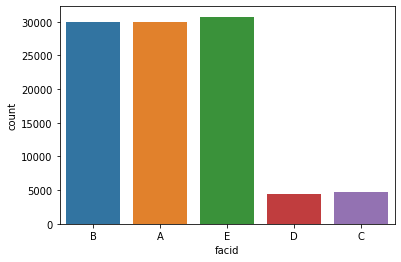

In [ ]:
import seaborn as sns
sns.countplot(x='facid',data=df_raw)

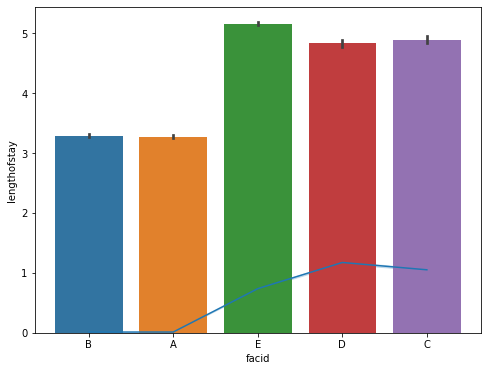

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
df_raw['total_symptoms'] = df_raw['asthma'] +df_raw['irondef']+df_raw['pneum']+df_raw['substancedependence']+df_raw['psychother'] + df_raw['fibrosisandother']+df_raw['malnutrition']
sns.barplot(x='facid',y='lengthofstay',data=df_raw)
sns.lineplot(x='facid',y='total_symptoms',data=df_raw)


##Univariate Analysis Insights
By performing univariate analysis we can gather these below insights
1. For most of the numerical feature the data is more or less distributed normally 
2. Length of stay or target variable is distributed log-normally with most of patients , 90% staying in hospital upto 8 days. So hospital develop there in-house service around a turnaround time of 8 days
3. Most patients only stay once in hospital and re-addmission counts follows a skewed log normal distribution.The probability of readmission all factor considered equal is 45%. 
4. Gender of patients is represented almost equally with more females than males 
5. For the sympotoms of patients dialysisrenalendstage , penumonia, fibrosis, the dataset is unevenly balanced . Overall the probability of any patient showing these is about 50%. Independently other symptoms are in between range of 3 to 10%. Most common symptom is psychologicaldisordermajor, hospital staff may be trained to deal with more psychological based disorders
6. BMI, Pulse, sodium , creatine measurements are normally distributed as expected. 
7. Some of the facilities are underreprented in the data e.g. C and D labeled facillities
8. Majority of patients have one or no secondary diagnosis about 60%. About 40% have wide ranging secondary diagonis from 2 to 10 diagnosis.Patients with more secondary diagonis will require more testing and different treatment plans.

## Bivariate and Multivarite analysis
1. Length of stay is strongly correlated with readmission counts of patients, patients will multiple readmission will have higher length of stay 
2. Length of stay is weakly correlated with psychologicaldisordermajor,hemo,facid ,malnutrition	, irondef,dialysisrenalendstage
3. Some of important parameters of health e.g. bmi, pulse, sodium, glucose has no real correlation with lenght of stay.
4. Some of the parameter has moderate collinearity e.g. psychother. The paramter homo is weakly correlated asthma, irondef, plamsa , rcount
5. The parameter is moderately correlated to gender
6. Fibrosis is moderalty correlated  to neutropholis
7. Hospital D and C seems to be more for specialized care with lower patients total come and higher symptoms density of adimitted patients



##Outlier Analysis
###Based on below analysis of PCA and isolation about 10% of data overall consists of outlier values. 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Percentage of data possible outliers: 0.1
       dialysisrenalendstage         asthma        irondef          pneum  \
count          100000.000000  100000.000000  100000.000000  100000.000000   
mean                0.036420       0.035270       0.094940       0.039450   
std                 0.187334       0.184462       0.293134       0.194664   
min                 0.000000       0.000000       0.000000       0.000000   
25%                 0.000000       0.000000       0.000000       0.000000   
50%                 0.000000       0.000000       0.000000       0.000000   
75%                 0.000000       0.000000       0.000000       0.000000   
max                 1.000000       1.000000       1.000000       1.000000   

       substancedependence  psychologicaldisordermajor        depress  \
count        100000.000000               100000.000000  100000.000000   
mean              0.063060                    0.239040       0.051660   
std               0.243072                   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4adfcbc430>]],
      dtype=object)

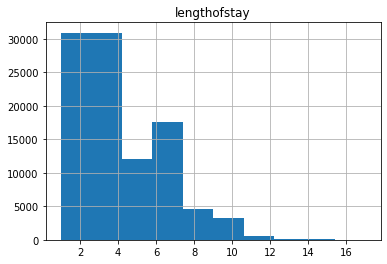

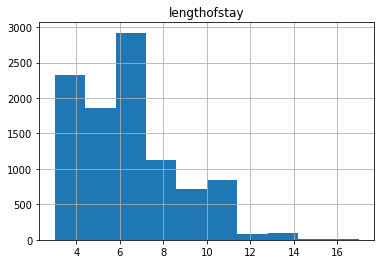

In [ ]:
from sklearn.ensemble import IsolationForest
import pandas as pd
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1),max_features=1.0)    
df_raw = pd.read_csv(URL)
df_raw.drop(['eid','vdate','discharged','rcount','gender','facid'],axis=1,inplace=True)
model.fit(df_raw)
outlier_labels = model.predict(df_raw)
num_outliers = (outlier_labels == -1).sum()
print(f'Percentage of data possible outliers: {num_outliers/df_raw.shape[0]}')
outlier_df = df_raw[outlier_labels == -1]
print(df_raw.describe())
print("----outlier------")
print(outlier_df.describe())
df_raw.hist(column='lengthofstay')
outlier_df.hist(column="lengthofstay")

##PCA

##PCA support outlier analysis finding showing that about 10% of patients will require more care and have greater sympotoms density and length of stay period


(100000, 2)
[[-50.60132909  -1.40845953]
 [ 47.92533551  -6.29761695]
 [ 11.4664208   -2.37371944]
 ...
 [ 33.71987064  -2.5350728 ]
 [ 30.2694741    1.40439775]
 [ -7.61558295  -2.21534497]]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


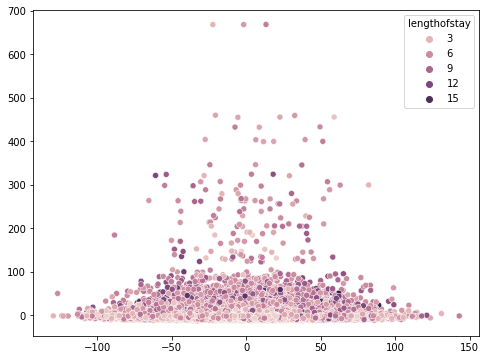

In [ ]:
from sklearn.decomposition import PCA
df_raw = pd.read_csv(URL)
df_raw.drop(['eid','vdate','discharged','rcount','gender','facid'],axis=1,inplace=True)
pca = PCA(n_components=2)
pca.fit(df_raw)
pca_data = pca.transform(df_raw)
print(pca_data.shape)
print(pca_data)
#plot the datapoints on a two dimensional graph with two principal components

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(pca_data[:,0],pca_data[:,1],hue=df_raw['lengthofstay'])
plt.show()

##Summary of preliminary Analysis

## II. Model Development

In [ ]:

metrics = {}

def print_metrics(y_true, y_pred):
    print("Mean Squared Error: ", mean_squared_error(y_true, y_pred))
    print("Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
    print("R2 Score: ", r2_score(y_true, y_pred))

##UpSampling(Optional)
###Since many of the symptoms occur only a minority of times we can oversample those rows we required 

In [ ]:
df_oversample = df_raw.loc[(df_raw['dialysisrenalendstage'] == 1) | (df_raw['asthma'] == 1) | (df_raw['irondef'] == 1) | (df_raw['pneum'] == 1) | (df_raw['substancedependence'] == 1) | (df_raw['psychologicaldisordermajor'] == 1) | (df_raw['depress'] == 1) | (df_raw['psychother'] == 1)]
df_oversample = df_oversample.append(df_oversample)
df_oversample = df_oversample.append(df_oversample)
df_oversample = df_oversample.append(df_oversample)
df_oversample = df_oversample.append(df_oversample)
df_oversample = df_oversample.append(df_oversample)

##K-means clustering

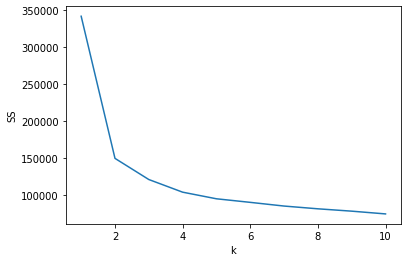

           rcount    gender  dialysisrenalendstage    asthma   irondef  \
cluster                                                                  
0        0.035547  0.036720               0.088196  0.037726  0.063464   
1        0.020560  0.038350               0.058287  0.024735  0.046309   
2        0.021477  0.043382               0.065644  0.029040  0.052658   
3        0.041820  0.033145               0.105655  0.042966  0.067927   
4        0.067574  0.041232               0.167282  0.072601  0.098816   
5        0.039873  0.021718               0.102879  0.038458  0.060566   

            pneum  substancedependence  psychologicaldisordermajor   depress  \
cluster                                                                        
0        0.233484             0.052230                    0.049799  0.004863   
1        0.000000             0.015684                    0.027817  0.003862   
2        0.156190             0.031181                    0.028755  0.003853   
3      

In [ ]:
URL = "LengthOfStay.csv"
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.base import TransformerMixin
df_raw = pd.read_csv(URL,infer_datetime_format=True,parse_dates=['vdate','discharged'])

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


class LabelEncoder(TransformerMixin):
  """
  LabelEncoder is a transformer that converts categorical values to numerical values.
  """
  def __init__(self):
    self.labels_ = None

  def fit(self, X, y=None):
    self.labels_ = np.unique(X)
    return self

  def transform(self, X, y=None):
    return np.searchsorted(self.labels_, X)


#to make the model primarily on patient parameters, we will drop eid, vdtae,discharged and facid since we already know that some of the facitilies are more specialized than others, this will reduce data leakage
df_raw = df_raw.drop(['eid','vdate','discharged','facid'],axis=1)
column_names = df_raw.columns
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),  MinMaxScaler())
#cat_pipeline = make_pipeline(
#    SimpleImputer(strategy="most_frequent"),
#    OneHotEncoder(handle_unknown="ignore"))
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    LabelEncoder())
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)
df_prepared = preprocessing.fit_transform(df_raw)
from sklearn.cluster import KMeans
import numpy as np
sse_values = []

# Loop over a range of k values
for k in range(1, 11):
    # Initialize the model with the current k value
    kmeans = KMeans(n_clusters=k)
    # Fit the model to the data
    kmeans.fit(df_prepared)
    # Get the SSE for the model
    sse = kmeans.inertia_
    # Add the SSE to the list
    sse_values.append(sse)

# Plot the SSE values
plt.plot(range(1, 11), sse_values)
plt.xlabel('k')
plt.ylabel('SS')
plt.show()

#applying kmeans with k=6 
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_prepared)
#predicting the clusters
clusters = kmeans.predict(df_prepared)
#convert to dataframe and add column names and cluster column
df_prepared = pd.DataFrame(df_prepared,columns=column_names)
df_prepared['cluster'] = clusters
#grouping by cluster and taking the mean of each cluster
print(df_prepared.groupby('cluster').mean())

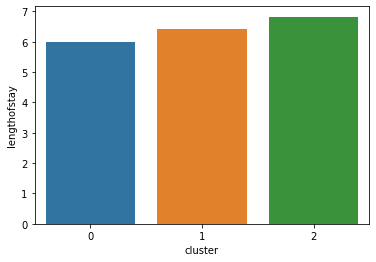

In [ ]:
#applying kmeans with k=6 
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_prepared)
#predicting the clusters
clusters = kmeans.predict(df_prepared)
#convert to dataframe and add column names and cluster column
df_prepared = pd.DataFrame(df_prepared,columns=column_names)
df_prepared['cluster'] = clusters

sns.barplot(x='cluster',y='lengthofstay',data=df_prepared)

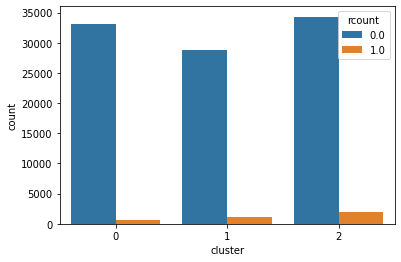

In [ ]:
sns.countplot(x='cluster',data=df_prepared,hue='rcount')

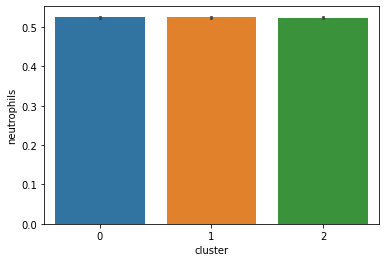

In [ ]:
sns.barplot(x='cluster',y='neutrophils',data=df_prepared)

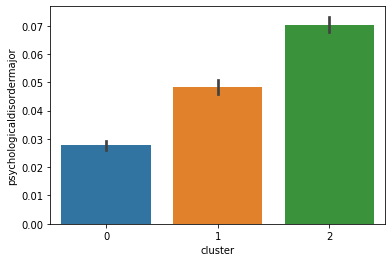

In [ ]:

sns.barplot(x='cluster',y='psychologicaldisordermajor',data=df_prepared)

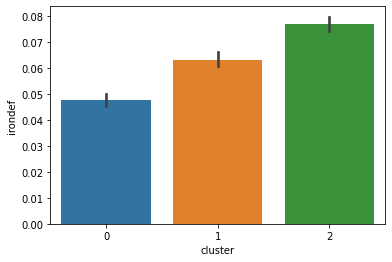

In [ ]:
sns.barplot(x='cluster',y='irondef',data=df_prepared)

##Findings for K-means
####1.Optimum number of cluster is around 3, based on SSE elbow analysis
####1.Three main cluster of in-patients with increasing length of stay values. 
####2.Features correlated with length of stay are impacted by clusters value, like for example rcount and iron deficieny for patients, cluster with more care requiring patients have higher iron deficiency for example 
####3.This support the idea that different branches of hospital can cater to these 3 differnt types of patients, with one type of hospital highing high patient count and lower symptom density and vice versa for other branches

##1.a.Random Forest


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   rcount                      100000 non-null  object 
 1   gender                      100000 non-null  object 
 2   dialysisrenalendstage       100000 non-null  int64  
 3   asthma                      100000 non-null  int64  
 4   irondef                     100000 non-null  int64  
 5   pneum                       100000 non-null  int64  
 6   substancedependence         100000 non-null  int64  
 7   psychologicaldisordermajor  100000 non-null  int64  
 8   depress                     100000 non-null  int64  
 9   psychother                  100000 non-null  int64  
 10  fibrosisandother            100000 non-null  int64  
 11  malnutrition                100000 non-null  int64  
 12  hemo                        100000 non-null  int64  
 13  hematocrit     

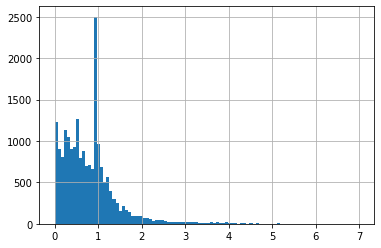

[1.0191954401567893, 1.0140425036880014, 0.8142405421565806, 0.8126033540261477, 0.8064527383738304]


In [92]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

URL = "LengthOfStay.csv"
import pandas as pd 
import numpy as np 

df_raw = pd.read_csv(URL,infer_datetime_format=True,parse_dates=['vdate','discharged'])

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
target = df_raw.pop('lengthofstay')
df_raw['discharged'] = pd.to_datetime(df_raw['discharged'])
df_raw['discharged_day'] = df_raw['discharged'].dt.day
df_raw['discharged_month'] = df_raw['discharged'].dt.month
df_raw['discharged_year'] = df_raw['discharged'].dt.year

df_raw['vdate'] = pd.to_datetime(df_raw['vdate'])
df_raw['vdate_day'] = df_raw['vdate'].dt.day
df_raw['vdate_month'] = df_raw['vdate'].dt.month
df_raw['vdate_year'] = df_raw['vdate'].dt.year

#to make the model primarily on patient parameters, we will drop eid, vdtae,discharged and facid since we already know that some of the facitilies are more specialized than others, this will reduce data leakage
df_raw = df_raw.drop(['eid','vdate','discharged','facid'],axis=1)

import numpy as np
from sklearn.base import TransformerMixin

class LabelEncoder(TransformerMixin):
  """
  LabelEncoder is a transformer that converts categorical values to numerical values.
  """
  def __init__(self):
    self.labels_ = None

  def fit(self, X, y=None):
    self.labels_ = np.unique(X)
    return self

  def transform(self, X, y=None):
    return np.searchsorted(self.labels_, X)



num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
#cat_pipeline = make_pipeline(
#    SimpleImputer(strategy="most_frequent"),
#    OneHotEncoder(handle_unknown="ignore"))
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    LabelEncoder())
#important features from feature selection ['bloodureanitro', 'respiration', 'hemo', 'hematocrit', 'psychologicaldisordermajor', 'facid', 'rcount']


categorical_features = df_raw.select_dtypes(include=['object']).columns
numerical_features = df_raw.select_dtypes(include=['int64','float64']).columns




X_categorical = cat_pipeline.fit_transform(df_raw[categorical_features])
X_numerical = num_pipeline.fit_transform(df_raw[numerical_features])

X_preprocessed = pd.concat([pd.DataFrame(X_categorical),pd.DataFrame(X_numerical)],axis=1)
column_names = df_raw.columns
print(df_raw.info())
columns_names = list(categorical_features) + list(numerical_features)
print(X_preprocessed.head())

def split_data(X, y, test_size=0.2, random_state=42):
    """
    split data into train and test sets with a given test size and random state
    """
    from sklearn.model_selection import train_test_split
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def rmse(y_true, y_pred):
    """
    rmse calcuate the root mean squared error for a given true and predicted values
    
    """
    from sklearn.metrics import mean_squared_error
    return np.sqrt(mean_squared_error(y_true, y_pred))

def print_scores(model,X_train, X_test, y_train, y_test):
    """
    print_scores prints the rmse and r2 scores for a given model and train and test sets
    """
    res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
              model.score(X_train, y_train), model.score(X_test, y_test)]
    if hasattr(model, 'oob_score_'): res.append(model.oob_score_)
    print(res)

def fit_data(model, X_train, X_test, y_train, y_test):
    """
    fit_data fits a given model with train and test sets and prints the scores
    """
    model.fit(X_train, y_train)
    print_scores(model,X_train, X_test, y_train, y_test)
    return model
X_train, X_test, y_train, y_test = split_data(X_preprocessed, target)
model = RandomForestRegressor(n_estimators=30, max_features=8, max_depth=8, min_samples_split=6,max_samples=0.2, n_jobs=-1, oob_score=True, random_state=42)
model = fit_data(model,X_train,X_test,y_train,y_test)
predicted_LOS = model.predict(X_test)
X_test_predicted = X_test.copy()
X_test_predicted['predicted_LOS'] = predicted_LOS
X_test_predicted['actual_LOS'] = y_test
X_test_predicted['error'] = abs(X_test_predicted['predicted_LOS'] - X_test_predicted['actual_LOS'])
print(X_test_predicted.head())
#plot the error distribution 
X_test_predicted['error'].hist(bins=100)
plt.show()
print_scores(model,X_train, X_test, y_train, y_test)


##1.b.RF model evaluation

0 rcount
1 gender
2 facid
3 dialysisrenalendstage
4 asthma
5 irondef
6 pneum
7 substancedependence
8 psychologicaldisordermajor
9 depress
10 psychother
11 fibrosisandother
12 malnutrition
13 hemo
14 hematocrit
15 neutrophils
16 sodium
17 glucose
18 bloodureanitro
19 creatinine
20 bmi
21 pulse
22 respiration
23 secondarydiagnosisnonicd9
24 discharged_day
25 discharged_month
26 discharged_year
27 vdate_day
28 vdate_month
29 vdate_year
error            1.000000
actual_LOS       0.285704
predicted_LOS    0.122775
0                0.077269
0                0.063679
15               0.053452
8                0.049097
12               0.045944
10               0.044311
7                0.043179
3                0.041535
9                0.040962
2                0.027389
2                0.017646
1                0.015878
17               0.015019
23               0.011983
4                0.011243
6                0.010913
16               0.007272
21               0.005128
13               

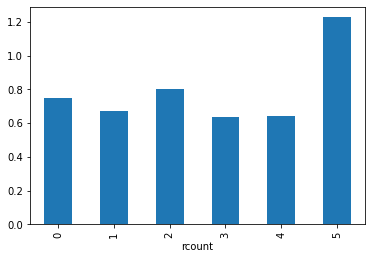

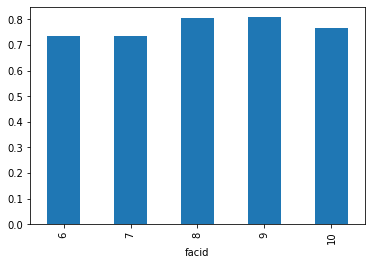

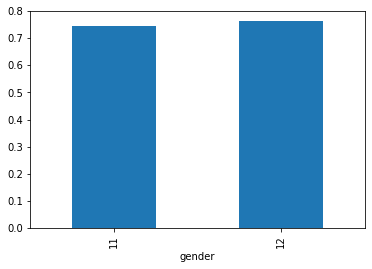

the mean of model trees is 3.897977998327279
the std of model trees is 0.4918761879080612
3.897977998327279
0.4918761879080612
0.08980389453896498


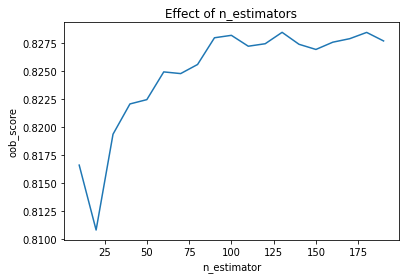

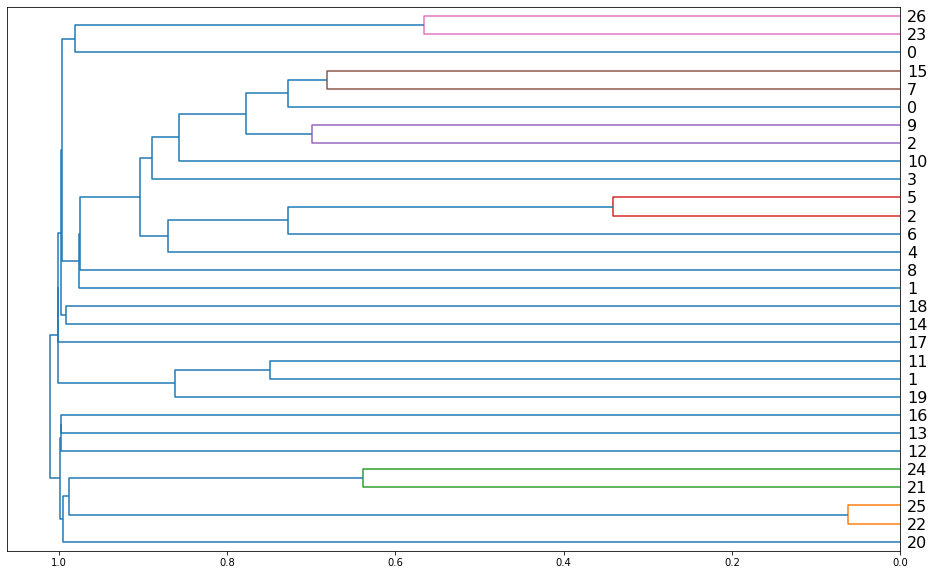

In [ ]:
for i in range(len(columns_names)):
    print(i,columns_names[i])
corr_matrix = X_test_predicted.corr()

print(corr_matrix['error'].sort_values(ascending=False))
X_test_predicted.columns = columns_names + ['predicted_LOS','actual_LOS','error']

#groupby average error for rcount
X_test_predicted.groupby('rcount')['error'].mean().plot(kind='bar')
plt.show()
X_test_predicted.groupby('facid')['error'].mean().plot(kind='bar')
plt.show()
X_test_predicted.groupby('gender')['error'].mean().plot(kind='bar')
plt.show()
predictions = np.stack ([t.predict(X_test) for t in model.estimators_]) 
#print mean and std of each prediction
print(f"the mean of model trees is {np.mean(predictions[:,0])}")
print(f"the std of model trees is {np.std(predictions[:,0])}")



def predict(model, X_test):
    return model.predict(X_test)


#implementing mean and std of trees using parallel approach

from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
predictions = Parallel(n_jobs=num_cores)(delayed(predict)(model, X_test) for model in model.estimators_)
#calculate mean and std of each prediction and standard error of mean
predictions = np.stack(predictions)
print(np.mean(predictions[:,0]))
print(np.std(predictions[:,0]))
print(np.std(predictions[:,0])/np.sqrt(len(predictions[:,0])))

#plot number of estimators vs out of bag score

estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.oob_score_)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("oob_score")
plt.plot(estimators, scores)
plt.show()

from scipy.cluster import hierarchy as hc
import scipy
corr = np.round(scipy.stats.spearmanr(X_preprocessed).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X_preprocessed.columns, orientation='left', leaf_font_size=16)

plt.show()

###1.c.Running Hyperopt to optimize RF model

In [ ]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
#import cross_val_score
from sklearn.model_selection import cross_val_score
#create hyperopt search space for random forest regressor
space = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 10, 200, 1)),
    'max_features': scope.int(hp.quniform('max_features', 1, 8, 1)),
    'max_depth': scope.int(hp.quniform('max_depth', 1, 20, 1)),
    'min_samples_split': hp.uniform('min_samples_split', 0.01, 1.0),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.01, 0.5),
    'bootstrap': hp.choice('bootstrap', [True, False]),
    'criterion': hp.choice('criterion', ['mse', 'mae'])
}

#function to optimize hyperparameters
def objective(space):
    model = RandomForestRegressor(n_estimators = space['n_estimators'],
                                  max_features = space['max_features'],
                                  max_depth = space['max_depth'],
                                  min_samples_split = space['min_samples_split'],
                                  min_samples_leaf = space['min_samples_leaf'],
                                  bootstrap = space['bootstrap'],
                                  criterion = space['criterion'])
    
    accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()
    
    return {'loss': -accuracy, 'status': STATUS_OK }

#run hyperopt
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)
#fit model with best hyperparameters
model = RandomForestRegressor(n_estimators = int(best['n_estimators']),max_features = int(best['max_features']),max_depth = int(best['max_depth']),min_samples_split = best['min_samples_split'],min_samples_leaf = best['min_samples_leaf'],bootstrap = best['bootstrap'],criterion = best['criterion'])
model.fit(X_train, y_train)
#predict on test set
y_pred = model.predict(X_test)
print_scores(model, X_test, y_test, y_pred)
#calculate mean squared error

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' w

  1%|          | 1/100 [00:19<31:26, 19.06s/it, best loss: -0.33039809492046446]

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'ma

  2%|▏         | 2/100 [14:30<13:51:14, 508.92s/it, best loss: -0.33039809492046446]

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(



  2%|▏         | 2/100 [47:30<38:47:38, 1425.09s/it, best loss: -0.33039809492046446]


KeyboardInterrupt: ignored

##1.d.Feature Importance

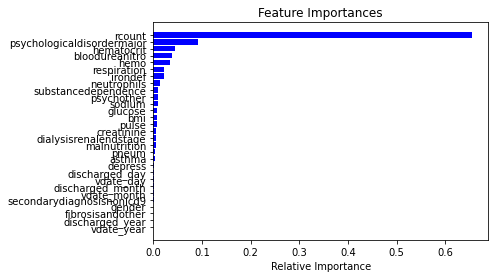

lenth of stay is most impact by patients ['irondef', 'respiration', 'hemo', 'bloodureanitro', 'hematocrit', 'psychologicaldisordermajor', 'rcount']


In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [columns_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#get top 7 important features
top_7_features = [columns_names[i] for i in indices[-7:]]
print(f"lenth of stay is most impact by patients {top_7_features}")

##1.e.Using sklearn pipeline for Random Forest Regressor
###Optionally we can use an end to end machine learning pipeline based on sklearn pipeline to get data from pandas, apply transformation and then apply random forest model

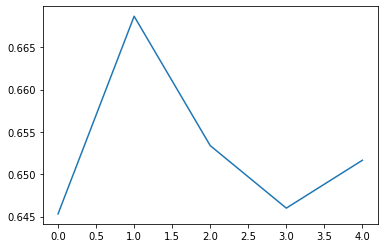

In [90]:
from sklearn.model_selection import cross_val_score
URL = "LengthOfStay.csv"
import pandas as pd 
import numpy as np 

df_raw = pd.read_csv(URL,infer_datetime_format=True,parse_dates=['vdate','discharged'])

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
target = df_raw.pop('lengthofstay')
df_raw['discharged'] = pd.to_datetime(df_raw['discharged'])
df_raw['discharged_day'] = df_raw['discharged'].dt.day
df_raw['discharged_month'] = df_raw['discharged'].dt.month
df_raw['discharged_year'] = df_raw['discharged'].dt.year

df_raw['vdate'] = pd.to_datetime(df_raw['vdate'])
df_raw['vdate_day'] = df_raw['vdate'].dt.day
df_raw['vdate_month'] = df_raw['vdate'].dt.month
df_raw['vdate_year'] = df_raw['vdate'].dt.year

#to make the model primarily on patient parameters, we will drop eid, vdtae,discharged and facid since we already know that some of the facitilies are more specialized than others, this will reduce data leakage
df_raw = df_raw.drop(['eid','vdate','discharged','facid'],axis=1)

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
#cat_pipeline = make_pipeline(
#    SimpleImputer(strategy="most_frequent"),
#    OneHotEncoder(handle_unknown="ignore"))
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder())
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)
df_prepared = preprocessing.fit_transform(df_raw)
rf_pipeline = make_pipeline(preprocessing, RandomForestRegressor())
tree_rmses = -cross_val_score(rf_pipeline, df_raw, target, cv=5, scoring="neg_root_mean_squared_error")
#plot tree_rmses
plt.plot(tree_rmses)





###1.f.Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {
        "random_forest__n_estimators": [80,100,150],
        "random_forest__max_features": [2, 4, 6, 8,10],
        "random_forest__max_depth": [6,8,10,12],
        
     
    },
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(df_raw, target)
grid_search.best_params_
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
# extra code – these few lines of code just make the DataFrame look nicer
cv_res["param_random_forest__max_features"] = cv_res["param_random_forest__max_features"].astype(int)
cv_res["param_random_forest__n_estimators"] = cv_res["param_random_forest__n_estimators"].astype(int)
print(cv_res.head(10))

KeyboardInterrupt: ignored

##1.g.Partial Dependency plotting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


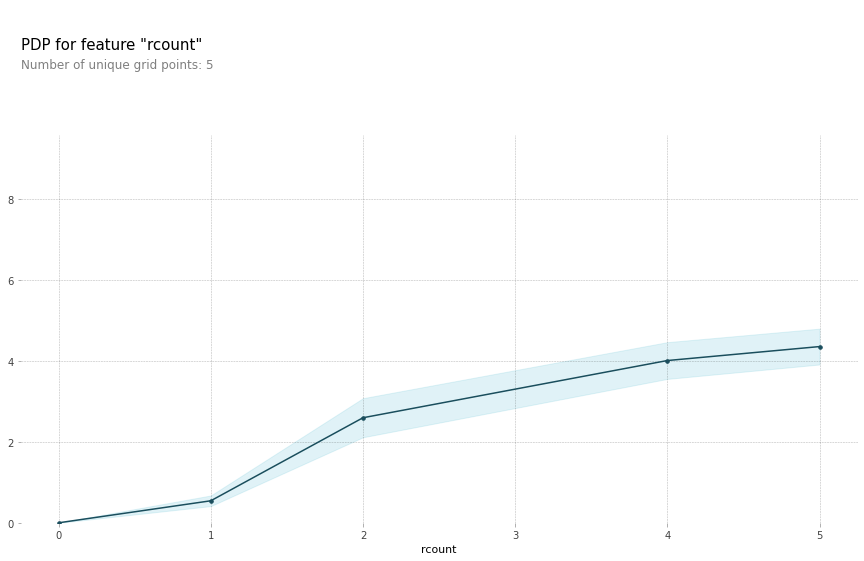

In [93]:
!pip install PDPbox
from pdpbox import pdp, get_dataset, info_plots
#add column names to X_test
X_test.columns = columns_names
def plot_pdp(feature):
    pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_test.columns, feature=feature)
    pdp.pdp_plot(pdp_goals, feature)
    plt.show()

plot_pdp('rcount')
plt.show()

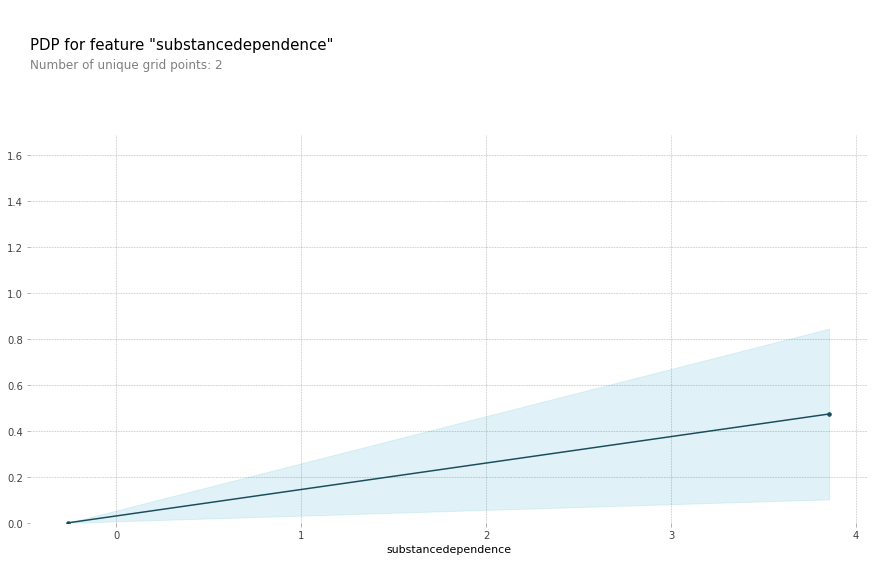

In [94]:
plot_pdp("substancedependence")

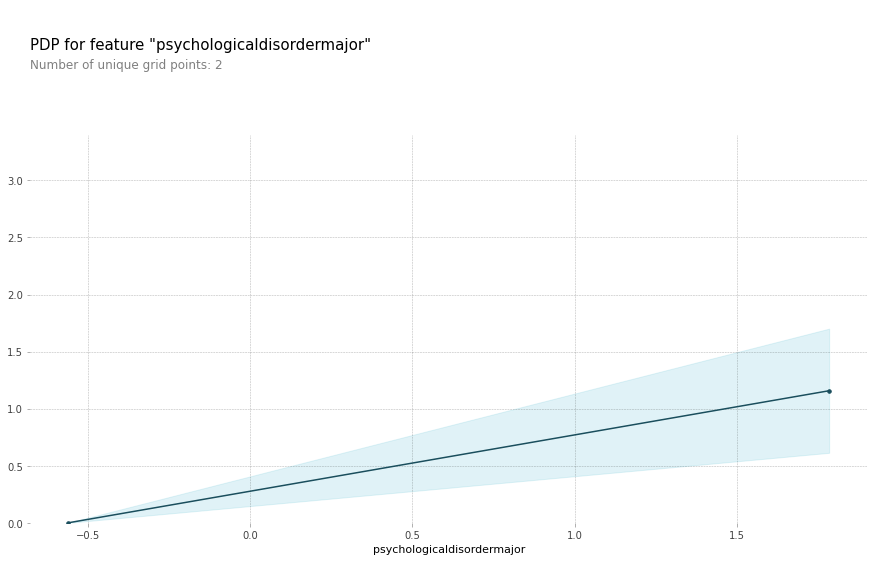

In [95]:

plot_pdp("psychologicaldisordermajor")

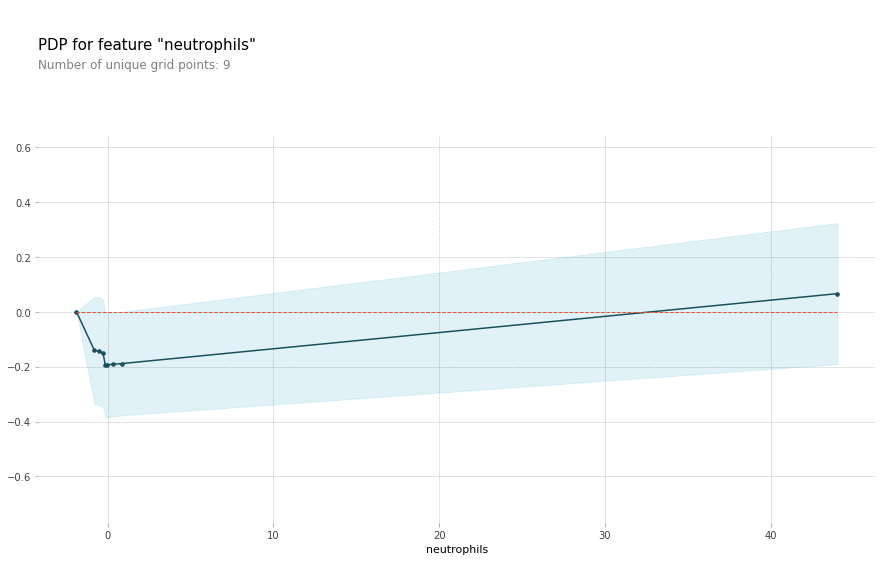

In [96]:

plot_pdp("neutrophils")

##2.LightGBM

In [8]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import lightgbm as lgb
import hyperopt
from hyperopt import fmin, tpe, hp
import lightgbm as lgb
from hyperopt.pyll import scope

import timeit

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


URL = "LengthOfStay.csv"
import pandas as pd 
import numpy as np 

df_raw = pd.read_csv(URL,infer_datetime_format=True,parse_dates=['vdate','discharged'])

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
target = df_raw.pop('lengthofstay')
df_raw['discharged'] = pd.to_datetime(df_raw['discharged'])
df_raw['discharged_day'] = df_raw['discharged'].dt.day
df_raw['discharged_month'] = df_raw['discharged'].dt.month
df_raw['discharged_year'] = df_raw['discharged'].dt.year

df_raw['vdate'] = pd.to_datetime(df_raw['vdate'])
df_raw['vdate_day'] = df_raw['vdate'].dt.day
df_raw['vdate_month'] = df_raw['vdate'].dt.month
df_raw['vdate_year'] = df_raw['vdate'].dt.year


df_raw = df_raw.drop(['eid','vdate','discharged'],axis=1)

import numpy as np



#convert the categorical columns to categorical type
for col in df_raw.select_dtypes(include='object').columns:
    df_raw[col] = df_raw[col].astype('category')

category_columns = list(df_raw.select_dtypes(include='category').columns)

X_train, X_test, y_train, y_test = train_test_split(df_raw, target, test_size=0.2, random_state=42)
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train,categorical_feature=category_columns,free_raw_data=False)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train,categorical_feature=category_columns,free_raw_data=False)

def print_metrics(y_test, y_pred):
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score: ", r2_score(y_test, y_pred))

#import cross_val_score from sklearn
from sklearn.model_selection import cross_val_score

# training lgb model using hyperopt

def objective(params):
  params = {
      'boosting_type': 'gbdt',
      'objective': 'regression',
      'metric': 'rmse',
      'num_leaves': int(params['num_leaves']),
  }

  clf = lgb.train(params, lgb_train,
                  num_boost_round=1000,
                  valid_sets=[lgb_train, lgb_eval],
                  early_stopping_rounds=10,
                  verbose_eval=100)
  score = clf.best_score['valid_1']['rmse']
  return score

space = {
    'num_leaves': hp.quniform('num_leaves', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'min_gain_to_split': hp.uniform('min_gain_to_split', 0.0, 1.0),
    'min_data_in_leaf': hp.uniform('min_data_in_leaf', 0, 100),
    'bagging_fraction': hp.uniform('bagging_fraction', 0.5, 1.0),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'lambda_l1': hp.uniform('lambda_l1', 0.0, 1.0),
    'lambda_l2': hp.uniform('lambda_l2', 0.0, 1.0),
    
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

print("Hyperopt estimated optimum {}".format(best))
#train on best parameters
params = {
      'boosting_type': 'gbdt',
      'objective': 'regression',
      'metric': 'rmse',
      'num_leaves': int(best['num_leaves']),
  }

clf = lgb.train(params, lgb_train,
                  num_boost_round=1000, 
                  valid_sets=[lgb_train, lgb_eval],
                  early_stopping_rounds=10,
                  verbose_eval=100)
#predict on test set
y_pred = clf.predict(X_test, num_iteration=clf.best_iteration)
#print metrics
print_metrics(y_test, y_pred)

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')



Training until validation scores don't improve for 10 rounds.
  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.8/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')



[100]	training's rmse: 0.447406	valid_1's rmse: 0.459714
[200]	training's rmse: 0.392956	valid_1's rmse: 0.419839
[300]	training's rmse: 0.372023	valid_1's rmse: 0.410372
[400]	training's rmse: 0.350761	valid_1's rmse: 0.398898
[500]	training's rmse: 0.331746	valid_1's rmse: 0.386547
[600]	training's rmse: 0.316549	valid_1's rmse: 0.378227
[700]	training's rmse: 0.303567	valid_1's rmse: 0.37237
Early stopping, best iteration is:
[779]	training's rmse: 0.295149	valid_1's rmse: 0.36926
Training until validation scores don't improve for 10 rounds.
[100]	training's rmse: 0.40097	valid_1's rmse: 0.432133
[200]	training's rmse: 0.355784	valid_1's rmse: 0.408975
Early stopping, best iteration is:
[254]	training's rmse: 0.342366	valid_1's rmse: 0.405662
Training until validation scores don't improve for 10 rounds.
[100]	training's rmse: 0.386692	valid_1's rmse: 0.426712
[200]	training's rmse: 0.344065	valid_1's rmse: 0.410129
[300]	training's rmse: 0.317221	valid_1's rmse: 0.405291
Early stopp

##3.XGBoost

In [ ]:
!pip install xgboost --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [7]:
!pip install xgboost -U
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

import hyperopt
from hyperopt import fmin, tpe, hp
import lightgbm as lgb
from hyperopt.pyll import scope

import timeit

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


URL = "LengthOfStay.csv"
import pandas as pd 
import numpy as np 

df_raw = pd.read_csv(URL,infer_datetime_format=True,parse_dates=['vdate','discharged'])

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
target = df_raw.pop('lengthofstay')
df_raw['discharged'] = pd.to_datetime(df_raw['discharged'])
df_raw['discharged_day'] = df_raw['discharged'].dt.day
df_raw['discharged_month'] = df_raw['discharged'].dt.month
df_raw['discharged_year'] = df_raw['discharged'].dt.year

df_raw['vdate'] = pd.to_datetime(df_raw['vdate'])
df_raw['vdate_day'] = df_raw['vdate'].dt.day
df_raw['vdate_month'] = df_raw['vdate'].dt.month
df_raw['vdate_year'] = df_raw['vdate'].dt.year


df_raw = df_raw.drop(['eid','vdate','discharged'],axis=1)

import numpy as np


#convert the categorical columns to categorical type
for col in df_raw.select_dtypes(include='object').columns:
    df_raw[col] = df_raw[col].astype('category')

category_columns = list(df_raw.select_dtypes(include='category').columns)

X_train, X_test, y_train, y_test = train_test_split(df_raw, target, test_size=0.2, random_state=42)

import xgboost as xgb
params = {
    "objective": "reg:squarederror",
    "booster": "gbtree",
    "learning_rate": 0.1,
    "max_depth": 7,
    "subsample": 0.9,
    "colsample_bytree": 0.9,
    "reg_alpha": 0.1,
    "reg_lambda": 0.1,
    "tree_method": "gpu_hist",
    "n_estimators": 300,
}



dtrain = xgb.DMatrix(X_train, label=y_train,enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test,enable_categorical=True)
model = xgb.train(params, dtrain, num_boost_round=20)
y_pred = model.predict(dtest)
def print_metrics(y_true, y_pred):
    print("Mean Squared Error: ", mean_squared_error(y_true, y_pred))
    print("Mean Absolute Error: ", mean_absolute_error(y_true, y_pred))
    print("R2 Score: ", r2_score(y_true, y_pred))
print_metrics(y_test, y_pred)


search_space = {
    "objective": "reg:squarederror",
    "booster": "gbtree",
    
    'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
    
    "learning_rate": hp.uniform("learning_rate", 0.01, 0.5),
    "max_depth": scope.int(hp.quniform("max_depth", 3, 14, 1)),
    "subsample": hp.uniform("subsample", 0.5, 1),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.5, 1),
    "reg_alpha": hp.uniform("reg_alpha", 0, 1),
    "reg_lambda": hp.uniform("reg_lambda", 0, 1)
}

def objective(params):
    model = xgb.train(params, dtrain, num_boost_round=20)
    y_pred = model.predict(dtest)
    return mean_squared_error(y_test, y_pred)

start = timeit.default_timer()
best = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=100)
stop = timeit.default_timer()
print('Time: ', stop - start)
#fit the model with the best parameters
best["max_depth"] = int(best["max_depth"])
model = xgb.train(best, dtrain, num_boost_round=20)
y_pred = model.predict(dtest)
print_metrics(y_test, y_pred)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[22:41:08] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

Mean Squared Error:  0.8983903266948288
Mean Absolute Error:  0.6798851189136506
R2 Score:  0.8362751644296753
100%|██████████| 100/100 [06:08<00:00,  3.68s/it, best loss: 0.23807121093922523]
Time:  368.09153234999985
Mean Squared Error:  0.23807121093922523
Mean Absolute Error:  0.3604898235231638
R2 Score:  0.9566133241789756


##4.MLP Keras Regression

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7269 - coeff_determination: 0.7753 - val_loss: 0.5989 - val_coeff_determination: 0.8592
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5423 - coeff_determination: 0.8803 - val_loss: 0.3815 - val_coeff_determination: 0.9274
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2287 - coeff_determination: 0.9536 - val_loss: 0.1804 - val_coeff_determination: 0.9651
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1480 - coeff_determination: 0.9687 - val_loss: 0.1395 - val_coeff_determination: 0.9708
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1313 - coeff_determination: 0.9736 - val_loss: 0.1200 - val_coeff_determination: 0.9745
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1241 - coeff_determination: 0.9757 - val_loss: 0.1253 - val_coeff_determination: 0.9756
Epoc

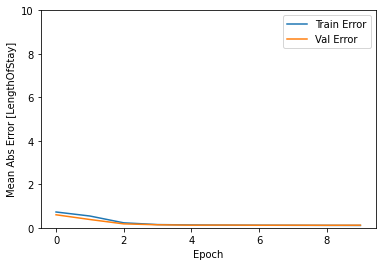

In [ ]:
URL = "LengthOfStay.csv"
import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.base import TransformerMixin
df_raw = pd.read_csv(URL,infer_datetime_format=True,parse_dates=['vdate','discharged'])

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
target = df_raw.pop('lengthofstay')
df_raw['discharged'] = pd.to_datetime(df_raw['discharged'])
df_raw['discharged_day'] = df_raw['discharged'].dt.day
df_raw['discharged_month'] = df_raw['discharged'].dt.month
df_raw['discharged_year'] = df_raw['discharged'].dt.year

df_raw['vdate'] = pd.to_datetime(df_raw['vdate'])
df_raw['vdate_day'] = df_raw['vdate'].dt.day
df_raw['vdate_month'] = df_raw['vdate'].dt.month
df_raw['vdate_year'] = df_raw['vdate'].dt.year
class LabelEncoder(TransformerMixin):
  """
  LabelEncoder is a transformer that converts categorical values to numerical values.
  """
  def __init__(self):
    self.labels_ = None

  def fit(self, X, y=None):
    self.labels_ = np.unique(X)
    return self

  def transform(self, X, y=None):
    return np.searchsorted(self.labels_, X)


#to make the model primarily on patient parameters, we will drop eid, vdtae,discharged and facid since we already know that some of the facitilies are more specialized than others, this will reduce data leakage
df_raw = df_raw.drop(['eid','vdate','discharged','facid'],axis=1)
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
#cat_pipeline = make_pipeline(
#    SimpleImputer(strategy="most_frequent"),
#    OneHotEncoder(handle_unknown="ignore"))
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    LabelEncoder())
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)
df_prepared = preprocessing.fit_transform(df_raw)
column_names = df_raw.columns
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_prepared, target, test_size=0.4, random_state=42)


normalizer_layer = tf.keras.layers.experimental.preprocessing.Normalization()
normalizer_layer.adapt(df_prepared)

model= tf.keras.Sequential([
    normalizer_layer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
#callbacks of earlystopping, tensorboard and modelcheckpoint
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=True)
]


#calcualte coffeiencient of determination   
def coeff_determination(y_true, y_pred):
    SS_res =  tf.keras.backend.sum(tf.keras.backend.square( y_true-y_pred ))
    SS_tot = tf.keras.backend.sum(tf.keras.backend.square( y_true - tf.keras.backend.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + tf.keras.backend.epsilon()) )

model.compile(loss='mean_absolute_error', optimizer='adam',metrics=[coeff_determination])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1,callbacks=callbacks)

#plot the loss and coefficent of determination
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [LengthOfStay]')
plt.plot(hist['epoch'], hist['loss'],
              label='Train Error')
plt.plot(hist['epoch'], hist['val_loss'],
                label = 'Val Error')    
plt.legend()
plt.ylim([0,10])
plt.show()


#show tensorboard graph
#%load_ext tensorboard
#%tensorboard --logdir logs

##Feature Importance using MLPs


0.8441336154937744
0.8623327016830444
0.8675816655158997
0.8670461773872375
0.8518645763397217
0.8645206093788147
0.8499652147293091
0.8703107237815857
0.8514537811279297
0.8582090139389038
0.857536256313324
0.8558182716369629
0.8518742918968201
0.8491590619087219
0.8482644557952881


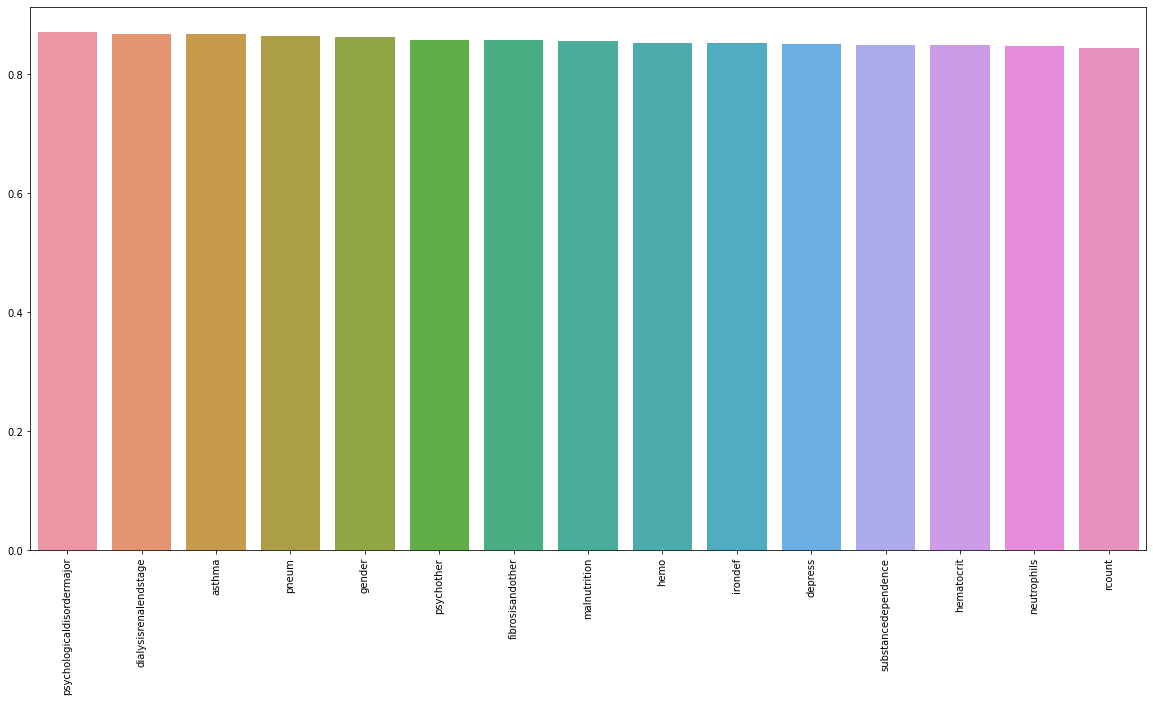

In [ ]:
all_columns = ["rcount","gender","dialysisrenalendstage","asthma","irondef","pneum","substancedependence","psychologicaldisordermajor","depress","psychother","fibrosisandother","malnutrition","hemo","hematocrit","neutrophils"]
#all_columns = ["rcount","dialysisrenalendstage","psychologicaldisordermajor"]

#create feature importance dictionary for each of all_columns by iterating over all columns and dropping one column at a time and calculating the coefficent of determination and calculating the difference between the coefficent of determination of the model with all columns and the model with one column dropped

def process_data_from_csv(df_raw,remove_column_featureimp=False,column_to_be_removed=None):
    if remove_column_featureimp:
        df_raw = df_raw.drop(column_to_be_removed,axis=1)
    target = df_raw.pop('lengthofstay')
    df_raw['discharged'] = pd.to_datetime(df_raw['discharged'])
    df_raw['discharged_day'] = df_raw['discharged'].dt.day
    df_raw['discharged_month'] = df_raw['discharged'].dt.month
    df_raw['discharged_year'] = df_raw['discharged'].dt.year

    df_raw['vdate'] = pd.to_datetime(df_raw['vdate'])
    df_raw['vdate_day'] = df_raw['vdate'].dt.day
    df_raw['vdate_month'] = df_raw['vdate'].dt.month
    df_raw['vdate_year'] = df_raw['vdate'].dt.year
    class LabelEncoder(TransformerMixin):
        """
        LabelEncoder is a transformer that converts categorical values to numerical values.
        """
        def __init__(self):
            self.labels_ = None

        def fit(self, X, y=None):
            self.labels_ = np.unique(X)
            return self

        def transform(self, X, y=None):
            return np.searchsorted(self.labels_, X)


    #to make the model primarily on patient parameters, we will drop eid, vdtae,discharged and facid since we already know that some of the facitilies are more specialized than others, this will reduce data leakage
    df_raw = df_raw.drop(['eid','vdate','discharged','facid'],axis=1)
    num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
    #cat_pipeline = make_pipeline(
    #    SimpleImputer(strategy="most_frequent"),
    #    OneHotEncoder(handle_unknown="ignore"))
    cat_pipeline = make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        LabelEncoder())
    preprocessing = make_column_transformer(
        (num_pipeline, make_column_selector(dtype_include=np.number)),
        (cat_pipeline, make_column_selector(dtype_include=object)),
    )
    df_prepared = preprocessing.fit_transform(df_raw)
    column_names = df_raw.columns
    return df_prepared, target, column_names
    

def training_loop(df_prepared,target,epochs,best_score=0.1197):
    #test train split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(df_prepared, target, test_size=0.4, random_state=42)
    normalizer_layer = tf.keras.layers.experimental.preprocessing.Normalization()
    normalizer_layer.adapt(df_prepared)
    model= tf.keras.Sequential([
        normalizer_layer,
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    #callbacks of earlystopping, tensorboard and modelcheckpoint
    callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.TensorBoard(log_dir='./logs'),
        tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=True)
    ]
    #calcualte coffeiencient of determination   
    def coeff_determination(y_true, y_pred):
        SS_res =  tf.keras.backend.sum(tf.keras.backend.square( y_true-y_pred ))
        SS_tot = tf.keras.backend.sum(tf.keras.backend.square( y_true - tf.keras.backend.mean(y_true) ) )
        return ( 1 - SS_res/(SS_tot + tf.keras.backend.epsilon()) )
    model.compile(loss='mean_absolute_error', optimizer='adam',metrics=[coeff_determination])
    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0,callbacks=callbacks)
    #get best value of validation loss
    best_val_loss = min(history.history['val_coeff_determination'])
    print(best_val_loss)
    return best_val_loss 

feature_importance_dict = {}
for column in all_columns:
    df_raw = pd.read_csv(URL,infer_datetime_format=True,parse_dates=['vdate','discharged'])
    df_prepared, target, column_names = process_data_from_csv(df_raw,remove_column_featureimp=True,column_to_be_removed=column)
    best_val_loss = training_loop(df_prepared,target,epochs=10)
    feature_importance_dict[column] = best_val_loss
  
import seaborn as sns
import matplotlib.pyplot as plt
feature_importance_dict = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1],reverse=True)}
plt.figure(figsize=(20,10))
sns.barplot(x=list(feature_importance_dict.keys()), y=list(feature_importance_dict.values()))
plt.xticks(rotation=90)
plt.show()


In [ ]:
def process_data_from_csv_small_model(df_raw,column_to_be_added,target,default_columns_to_be_read=['eid','vdate','discharged','facid','bmi','pulse']):
    default_columns_to_be_read = default_columns_to_be_read + [column_to_be_added] + [target]
    df_raw = df_raw[default_columns_to_be_read]
    target = df_raw.pop(target)
    df_raw['discharged'] = pd.to_datetime(df_raw['discharged'])
    df_raw['discharged_day'] = df_raw['discharged'].dt.day
    df_raw['discharged_month'] = df_raw['discharged'].dt.month
    df_raw['discharged_year'] = df_raw['discharged'].dt.year

    df_raw['vdate'] = pd.to_datetime(df_raw['vdate'])
    df_raw['vdate_day'] = df_raw['vdate'].dt.day
    df_raw['vdate_month'] = df_raw['vdate'].dt.month
    df_raw['vdate_year'] = df_raw['vdate'].dt.year
    class LabelEncoder(TransformerMixin):
        """
        LabelEncoder is a transformer that converts categorical values to numerical values.
        """
        def __init__(self):
            self.labels_ = None

        def fit(self, X, y=None):
            self.labels_ = np.unique(X)
            return self

        def transform(self, X, y=None):
            return np.searchsorted(self.labels_, X)


    #to make the model primarily on patient parameters, we will drop eid, vdtae,discharged and facid since we already know that some of the facitilies are more specialized than others, this will reduce data leakage
    df_raw = df_raw.drop(['eid','vdate','discharged','facid'],axis=1)
    num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
    #cat_pipeline = make_pipeline(
    #    SimpleImputer(strategy="most_frequent"),
    #    OneHotEncoder(handle_unknown="ignore"))
    cat_pipeline = make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        LabelEncoder())
    preprocessing = make_column_transformer(
        (num_pipeline, make_column_selector(dtype_include=np.number)),
        (cat_pipeline, make_column_selector(dtype_include=object)),
    )
    df_prepared = preprocessing.fit_transform(df_raw)
    
    return df_prepared, target
all_columns = ["rcount","gender","dialysisrenalendstage","asthma","irondef","pneum","substancedependence","psychologicaldisordermajor","depress","psychother","fibrosisandother","malnutrition","hemo","hematocrit","neutrophils"]

feature_importance_dict = {}
for column in all_columns:
    df_raw = pd.read_csv(URL,infer_datetime_format=True,parse_dates=['vdate','discharged'])
    df_prepared, target = process_data_from_csv_small_model(df_raw,column,target='lengthofstay')
    best_val_loss = training_loop(df_prepared,target,epochs=10)
    feature_importance_dict[column] = best_val_loss
  
import seaborn as sns
import matplotlib.pyplot as plt
feature_importance_dict = {k: v for k, v in sorted(feature_importance_dict.items(), key=lambda item: item[1],reverse=True)}
plt.figure(figsize=(20,10))
sns.barplot(x=list(feature_importance_dict.keys()), y=list(feature_importance_dict.values()))
plt.xticks(rotation=90)
plt.show()


<ipython-input-11-60fc06561c5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['discharged'] = pd.to_datetime(df_raw['discharged'])
<ipython-input-11-60fc06561c5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['discharged_day'] = df_raw['discharged'].dt.day
<ipython-input-11-60fc06561c5d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

0.07364077866077423


<ipython-input-11-60fc06561c5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['discharged'] = pd.to_datetime(df_raw['discharged'])
<ipython-input-11-60fc06561c5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['discharged_day'] = df_raw['discharged'].dt.day
<ipython-input-11-60fc06561c5d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

0.07077474147081375


<ipython-input-11-60fc06561c5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['discharged'] = pd.to_datetime(df_raw['discharged'])
<ipython-input-11-60fc06561c5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['discharged_day'] = df_raw['discharged'].dt.day
<ipython-input-11-60fc06561c5d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

0.07465597987174988


<ipython-input-11-60fc06561c5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['discharged'] = pd.to_datetime(df_raw['discharged'])
<ipython-input-11-60fc06561c5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['discharged_day'] = df_raw['discharged'].dt.day
<ipython-input-11-60fc06561c5d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

0.08511070162057877


<ipython-input-11-60fc06561c5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['discharged'] = pd.to_datetime(df_raw['discharged'])
<ipython-input-11-60fc06561c5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw['discharged_day'] = df_raw['discharged'].dt.day
<ipython-input-11-60fc06561c5d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

KeyboardInterrupt: ignored

##6.Model Comparison and Selection 

### XGboost - R2 - 0.952, LightGBM - R2- 0.975 , MLP - R2 - 0.979
### MLP seems to have the highest R2 score, however in terms of explainiblity tree based models either XGboost or lightGBM can be selected